<h1>
    <center>
        Color and image transformations

In this lesson we will continue studying principles of image processing and color transformations with openCV
```Python
import cv2
import matplotlib.pyplot as plt
```

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Review of the last lesson

Load an image with openCV `imread`

In [2]:
img = cv2.imread('red.jpeg')

# Visualization

Vizualize the image with matplotlib using the`plt.imshow(image)` method

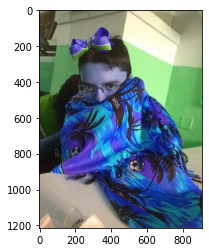

In [3]:
plt.imshow(img)

# color space

Convert the color space from BGR to RGB with the command cv2.cvtColor(image, cv2.COLOR_BGR2RGB) and then preview the image with plt.imshow().

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

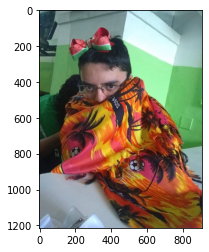

In [5]:
plt.imshow(img_rgb)

# Viewing the image size

Use the shape parameter to visualize the size of the image

In [6]:
img.shape

(1214, 910, 3)

# Grayscale Conversion

Convert the BGR image to gray scale with the method `cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)` and preview the result with the method `plt.imshow(image_gray, cmap="gray")`.

In [7]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

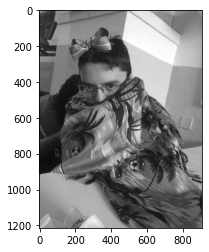

In [8]:
plt.imshow(img_gray, cmap='gray')

# Roi

Load the image with people-conversing and preview it.

In [9]:
img_people = cv2.imread('conversing.jpeg')

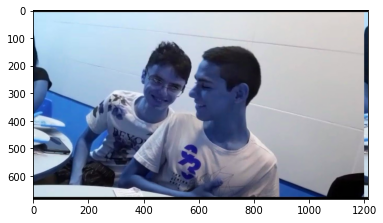

In [10]:
plt.imshow(img_people)

Determine the face of one of the people as the region of interest, and highlight it in a roi_image and then vizualize it.

In [11]:
img_roi = img_people[100:365, 380:580]

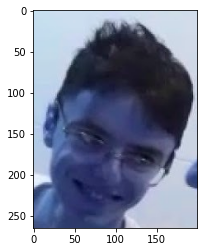

In [12]:
plt.imshow(img_roi)

# Save a face

In [13]:
cv2.imwrite('face.jpeg', img_roi)

True

# Save a BGR face

In [14]:
img_bgroi = cv2.cvtColor(img_roi, cv2.COLOR_BGR2RGB)
cv2.imwrite('bgr-face.jpeg', img_bgroi)

True

# Red highlight

Load and view the image yellow_flower.webp

In [15]:
img_highlight = cv2.imread('red.jpeg')
img_highlight = cv2.cvtColor(img_highlight, cv2.COLOR_BGR2RGB)

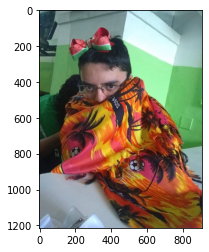

In [16]:
plt.imshow(img_highlight)

Create a new grayscale image of the original image.

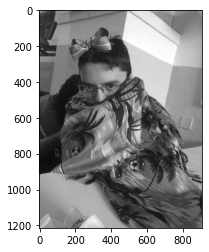

In [17]:
highlight_gray = cv2.cvtColor(img_highlight, cv2.COLOR_RGB2GRAY)
plt.imshow(highlight_gray, cmap="gray")

Replace all color channels except red with grayscale.

In [18]:
red_highlight = img_highlight.copy()
red_highlight[:, :, 1] = highlight_gray
red_highlight[:, :, 2] = highlight_gray

View the new image

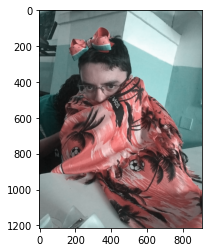

In [19]:
plt.imshow(red_highlight)

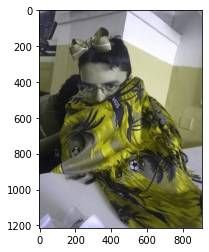

In [20]:
blue_highlight = img_highlight.copy()
blue_highlight[:, :, 0] = highlight_gray
blue_highlight[:, :, 1] = highlight_gray
plt.imshow(blue_highlight)

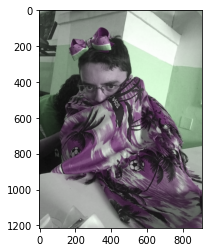

In [21]:
green_highlight = img_highlight.copy()
green_highlight[:, :, 0] = highlight_gray
green_highlight[:, :, 2] = highlight_gray
plt.imshow(green_highlight)

# Perform this process for all color channels

<h1>
    <center>
        Image Transformations using OpenCV in Python

# Image Translation

Image translation is the rectilinear shift of an image from one location to another, so the shifting of an object is called translation.

Now that you understand image translation, let's take a look at the Python code. In OpenCV, there are two built-in functions for performing transformations:

* `cv2.warpPerspective`: takes (3x3) transformation matrix as input.
* `cv2.warpAffine`: takes a (2x3) transformation matrix as input.

Both functions take three input parameters:

* The input image.
* Transformation matrix.
* A tuple of the height and width of the image.

In this tutorial, we'll use cv2.warpPerspective() function.

The below code reads an input image (if you want the exact output, get the demo image here and put it in the current working directory), translates it, and shows it:

## Load the image

In [22]:
img = cv2.imread('transformation.jpeg')

## Convert from BGR to RGB so we can plot using matplotlib

In [23]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Show the image

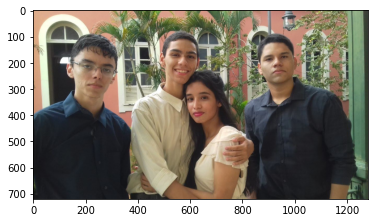

In [24]:
plt.imshow(img)

## get the image shape

In [25]:
height, width, channels = img.shape
shape = (width, height)

## Transformation matrix for translation

```Python
bx = 200;
by = 200;

M = np.float32([[1, 0, bx],
                [0, 1, by],
                [0, 0, 1]])
```

In [26]:
bx = 200;
by = 200;

M = np.float32([[1, 0, bx],
                [0, 1, by],
                [0, 0, 1]])

## Apply a perspective transformation to the image

In [27]:
transformed = cv2.warpPerspective(img, M, shape)

## Show the resulting image

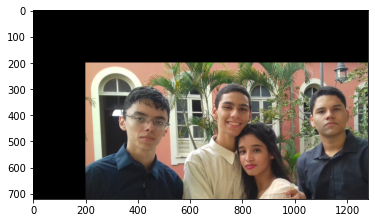

In [28]:
plt.imshow(transformed)

# Image Scaling

Image scaling is a process used to resize a digital image. OpenCV has a built-in function `cv2.resize()`, but we will perform transformation using matrix multiplication as previously

```Python
sx = 1.5
sy = 1.5

M = np.float32([[1.5, 0  , 0],
               [0,   1.8, 0],
               [0,   0,   1]])
```

In [29]:
sx = 1.5
sy = 1.5

M = np.float32([[1.5, 0  , 0],
               [0,   1.8, 0],
               [0,   0,   1]])

## Apply a perspective transformation to the image

* Note: Multiply the number of rows and columns by 2

In [30]:
shape = (width*2, height*2)

In [31]:
transformed = cv2.resize(img, shape, M)

## Show the resulting image

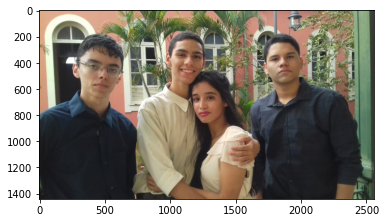

In [32]:
plt.imshow(transformed)

# Image Shearing

Shear mapping is a linear map that displaces each point in a fixed direction, it substitutes every point horizontally or vertically by a specific value in proportion to its x or y coordinates, there are two types of shearing effects.

* Shearing in the x-axis Direction
* Shearing in the y-axis Direction

## Shearing in the x-axis Direction

```Python
sx = 0.5
M = np.float32([[1, sx  , 0],
               [0,   1, 0],
               [0,   0,   1]])
```

In [66]:
sx = 0.5
M = np.float32([[1, sx, 0],
                [0, 1, 0],
                [0, 0, 1]])

## Apply a perspective transformation to the image  

In [67]:
shape = (width, height)

In [68]:
transformed = cv2.warpPerspective(img, M, shape)

## Show the resulting image

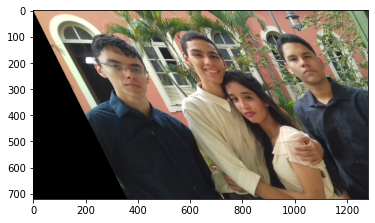

In [69]:
plt.imshow(transformed)

## Save the resulting image to disk

In [70]:
cv2.imwrite('horizontal-shear.jpeg', transformed)

True

## Shearing in the y-axis Direction

```Python
sy = 0.5
M = np.float32([[1, 0  , 0],
               [sy,   1, 0],
               [0,   0,   1]])
```

In [82]:
sy = 0.5
M = np.float32([[1, 0, 0],
               [sy, 1, 0],
               [0,  0, 1]])

## Apply a perspective transformation to the image  

In [83]:
transformed = cv2.warpPerspective(img, M, shape)

## Show the resulting image

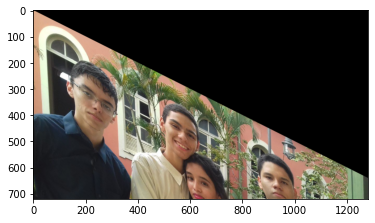

In [84]:
plt.imshow(transformed)

# Image Reflection

Image reflection (or mirroring) is useful for flipping an image, it can flip the image vertically as well as horizontally, which is a particular case of scaling. For reflection along the x-axis, we set the value of Sy to -1, and Sx to 1, and vice-versa for the y-axis reflection.

## Transformation matrix for x-axis reflection 

```Python
M = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])
```

In [85]:
M = np.float32([[1,  0, 0],
                [0, -1, height],
                [0,  0, 1]])

## Apply a perspective transformation to the image

In [86]:
transformed = cv2.warpPerspective(img, M, shape)

## Show the resulting image

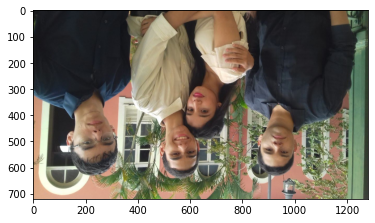

In [87]:
plt.imshow(transformed)

## Save the resulting image to disk

In [92]:
# depois

## Transformation matrix for x-axis reflection 

```Python
M = np.float32([[-1, 0, cols],
                 [ 0, 1, 0   ],
                 [ 0, 0, 1   ]])
```

In [93]:
M = np.float32([[-1, 0, width],
                [ 0, 1, 0],
                [ 0, 0, 1]])

## Apply a perspective transformation to the image

In [94]:
transformed = cv2.warpPerspective(img, M, shape)

## Show the resulting image

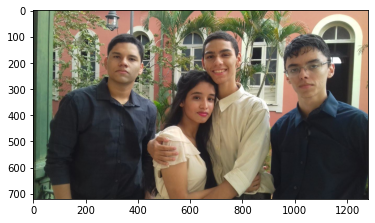

In [95]:
plt.imshow(transformed)

## Save the resulting image to disk

In [96]:
# depois

# Image Rotation

Rotation is a concept in mathematics that is a motion of a certain space that preserves at least one point. Image rotation is a common image processing routine with applications in matching, alignment, and other image-based algorithms, it is also extensively in data augmentation, especially when it comes to image classification.

## Angle from degree to radian

```Python
dgr = 10
angle = np.radians(dgr)
```

In [97]:
dgr = 10
angle = np.radians(dgr)

## Transformation matrix for Rotation

In [ ]:
M = np.float32([[np.sin(angle), -np.cos(angle), width],
                [ np.cos(angle), np.s, 0],
                [ 0, 0, 1]])

# Apply a perspective transformation to the image

## Show the resulting image

## Save the resulting image to disk